In [296]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Setting plots style
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [298]:
#Downloading the data set 
ess_data = pd.read_csv('ESS10.csv')

/var/folders/hz/njnpp78d0bl4_x9td6ncpkzc0000gn/T/ipykernel_1505/456114059.py:2: DtypeWarning: Columns (166,172,174,607,608) have mixed types. Specify dtype option on import or set low_memory=False.
  ess_data = pd.read_csv('ESS10.csv')


In [642]:
# Selecting the country (in my case it is Switzerland) & needed variables from dataset
# All the detailed information about variables will be provided during further steps 

swiss_data = ess_data[ess_data['cntry'] == 'CH']
required_data = ['idno', 'acchome', 'sclact', 'closepnt', 'teamfeel', 'happy', 'ttminpnt', 'agea', 'domicil', 'hhlipnt', 'colprop']
swiss_data = swiss_data[required_data].copy()

In [644]:
# As I will be converting data into different types for more precise analysis, I want to make sure that my original data set will be accesiable, so I will copy my data set and save it as a new variable
swiss_data_backup = swiss_data.copy()

In [646]:
swiss_data.head()
# This shows us first 5 rows of our filtered data set

,idno,acchome,sclact,closepnt,teamfeel,happy,ttminpnt,agea,domicil,hhlipnt,colprop
4059,10004,1,2,2,55,8,10,57,3,2,6
4060,10014,1,2,1,10,10,5,33,4,2,7
4061,10019,0,3,6,66,10,6666,90,4,6,66
4062,10024,1,3,2,10,7,6666,22,4,1,2
4063,10038,1,3,6,55,7,6666,72,4,6,55


In [648]:
swiss_data.shape
# This shows us that in our data set we have 1523 rows and 11 columns

(1523, 11)

In [650]:
swiss_data.dtypes
# In my data set all variables represented as numeric, they have "integer" type

idno        int64
acchome     int64
sclact      int64
closepnt    int64
teamfeel    int64
happy       int64
ttminpnt    int64
agea        int64
domicil     int64
hhlipnt     int64
colprop     int64
dtype: object

In [652]:
swiss_data.describe()
# Here looking at the "idno" colum will not provide any valuable insights, because this varible stands for indetification number of a respondent.
# Also, the descriptive table at this stage may not be accurate, because in the data set there are some variables, that are coded numerically and stand for "Don't know" answer, for example

swiss_clean = swiss_data.copy()
swiss_clean = swiss_clean.drop(columns=['idno'])

# Before providing with a descriptive table wuthout extreme inappropriate values, I fisrt clean my data

# sclact: keep only values 1-6 (exclude 7,8,9)
swiss_clean = swiss_clean[~swiss_clean['sclact'].isin([7, 8, 9])]

# closepnt: keep only values less than 6
swiss_clean = swiss_clean[swiss_clean['closepnt'] < 6]

# happy: keep only values between 0-10
swiss_clean = swiss_clean[(swiss_clean['happy'] >= 0) & (swiss_clean['happy'] <= 10)]

# teamfeel: keep only values between 0-10
swiss_clean = swiss_clean[(swiss_clean['teamfeel'] >= 0) & (swiss_clean['teamfeel'] <= 10)]

# ttminpnt: exclude special codes
swiss_clean = swiss_clean[~swiss_clean['ttminpnt'].isin([6666, 7777, 8888, 9999])]

# agea: exclude special codes
swiss_clean = swiss_clean[~swiss_clean['agea'].isin([777, 888, 999])]

# domicil: keep only values less than 6
swiss_clean = swiss_clean[swiss_clean['domicil'] < 6]

# hhlipnt: keep only values less than 6
swiss_clean = swiss_clean[swiss_clean['hhlipnt'] < 6]

# colprop: keep only values less than 6
swiss_clean = swiss_clean[swiss_clean['colprop'] < 8]

swiss_clean.describe()

,acchome,sclact,closepnt,teamfeel,happy,ttminpnt,agea,domicil,hhlipnt,colprop
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.0,599.000000
mean,0.976628,2.779633,2.268781,8.564274,8.156928,171.908180,42.534224,3.307179,2.0,3.584307
std,0.151209,0.818792,0.903103,1.710324,1.363186,322.647078,11.060570,0.996213,0.0,1.984679
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,1.000000,2.0,1.000000
25%,1.000000,2.000000,2.000000,8.000000,8.000000,10.000000,33.000000,3.000000,2.0,2.000000
50%,1.000000,3.000000,2.000000,9.000000,8.000000,30.000000,42.000000,4.000000,2.0,4.000000
75%,1.000000,3.000000,3.000000,10.000000,9.000000,164.500000,52.000000,4.000000,2.0,5.000000
max,1.000000,5.000000,5.000000,10.000000,10.000000,3000.000000,74.000000,5.000000,2.0,7.000000


In [654]:
# Looking at the means, we can state the following:
# - On average people in Switzerland do have an access to the Internet, as 1 stands for "Have an access to Internet". So they have an ability to follow the news, stay up-to-dated, communicate with their family and friends via the Internet.
# - On average people in Switzerland estimate their level of social activity is about the same as people of their age (as 3 stands for "About the same"). So Swiss people do not feel socially excluded on average.
# - On average people in Switzerland feel pretty close to their parents, which is also a great indicator to judge whether Swiss people feel excluded from society and lack attention from their significant others. 
# - On average people in Switzerland feel like they belong to a team, as the mean is pretty high (8.5) out of 10 scale. The same situation is for "happy" variable, as Swiss people tend to feel happy on average.
# - On average people in Switzerland live 3 hours away (173.4 mins) from their parents, meaning that on average grown-up children and their parents live far apart.

In [656]:
print("\nMissing values:")
print(swiss_clean.isnull().sum())

# No missing values in my dataset

swiss_clean.isnull().sum() / swiss_clean.shape[0]

# Therefore, the percentage of NaN values in each column is zero 


Missing values:
acchome     0
sclact      0
closepnt    0
teamfeel    0
happy       0
ttminpnt    0
agea        0
domicil     0
hhlipnt     0
colprop     0
dtype: int64


acchome     0.0
sclact      0.0
closepnt    0.0
teamfeel    0.0
happy       0.0
ttminpnt    0.0
agea        0.0
domicil     0.0
hhlipnt     0.0
colprop     0.0
dtype: float64

acchome
Has internet access    1419
No internet access      104
Name: count, dtype: int64


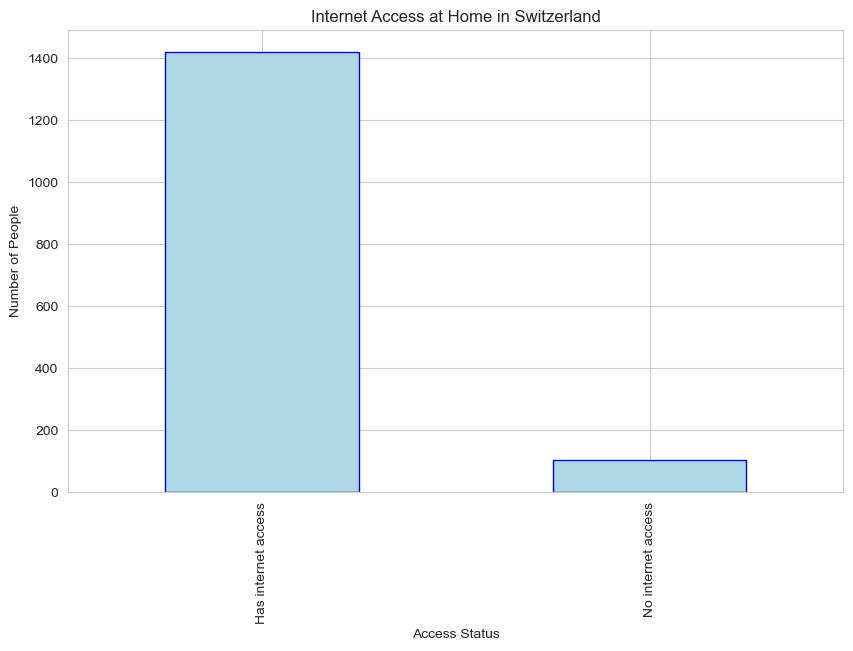

In [658]:
# Nominal variable: “acchome”
# This variables represent the ability of the respondent to access the internet from home

swiss_data['acchome'] = swiss_data['acchome'].map({
    0: "No internet access",
    1: "Has internet access"
})

print(swiss_data['acchome'].value_counts())

# Descriptive bar plot "How many people have access to the internet at home?"
swiss_data['acchome'].value_counts().plot(
    kind='bar',
    color='lightblue',
    edgecolor='blue'
)
plt.title("Internet Access at Home in Switzerland")
plt.xlabel("Access Status")
plt.ylabel("Number of People")
plt.show()

In [660]:
# This is nominal (binary) variable, thus we cannot check normality of the distribution and describe it’s shape.
# Conclusion: In Switzerland there are much more people (1419) who have an access to the internet at home in comparison to those who don’t have (104).  This indicates a substantial disparity, with the majority of the population having internet access at home.

In [662]:
# Nominal variable: “domicil”
# This variables represent the area where the respondent lives ("Which phrase on this card best describes the area where you live?")
swiss_clean = swiss_clean[swiss_clean['domicil'].isin([1, 2, 3, 4, 5])]
swiss_clean['area_category'] = swiss_clean['domicil'].map({
    1: 'A big city',
    2: 'Suburbs or outskirts of big city',
    3: 'Town or small city',
    4: 'Country village',
    5: 'Farm or home in countryside'
}).astype('category')

In [560]:
# Ordinal variable: “sclact”
# This variable represents answers of respondents to the question “Compared to other people of your age, how often would you say you take part in social activities?”.

# Deleting observations, which are not needed for the analysis: Refusal* & Don't know*
clean_data = swiss_data[~swiss_data['sclact'].isin([7, 8, 9])].copy()
labels = {
    1: "Much less than most",
    2: "Less than most", 
    3: "About the same",
    4: "More than most",
    5: "Much more than most"
}
# This variable is represented as numeric, so we assigning ordered factor variable type
clean_data['activity_level'] = clean_data['sclact'].map(labels)
print(clean_data['activity_level'].value_counts())

activity_level
About the same         691
Less than most         455
More than most         206
Much less than most    116
Much more than most     31
Name: count, dtype: int64


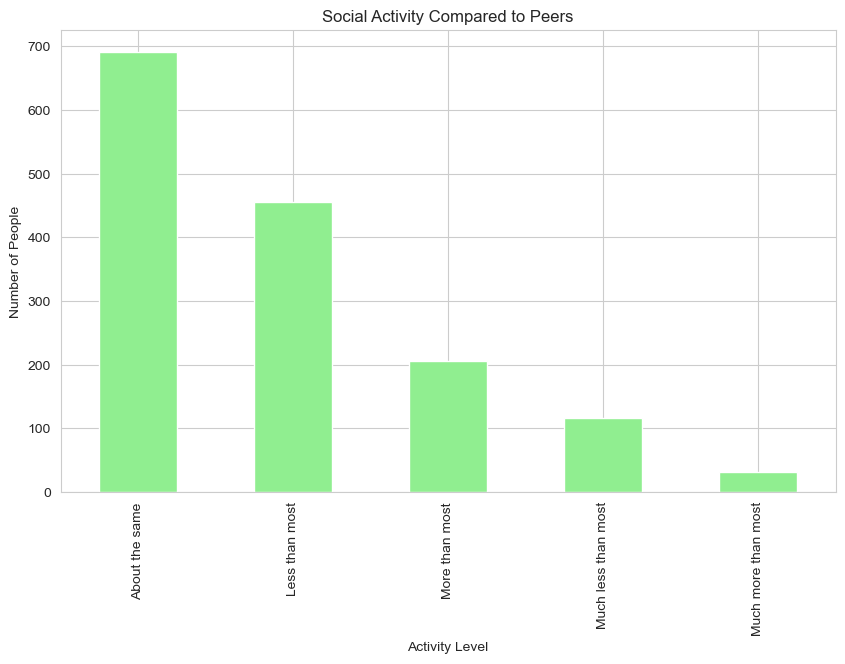

In [562]:
# Bar plot "How often do people participate in social activities (compared to others of same age)?"

clean_data['activity_level'].value_counts().plot(
    kind='bar',
    color='lightgreen',
    title='Social Activity Compared to Peers'
)

plt.xlabel('Activity Level')
plt.ylabel('Number of People')
plt.show()

In [564]:
# Conclusion: People in Switzerland think that they are take part in social activities in the same level as others of their age. So this lead us to a thought that Swiss society may have homogeneous social expectations and live in a more coherent united society. Fewer people tend to think they participate less than others, would be interesting to investigate the demographics (age) of this people (probably elderly, rural residents, or marginalized groups facing exclusion).

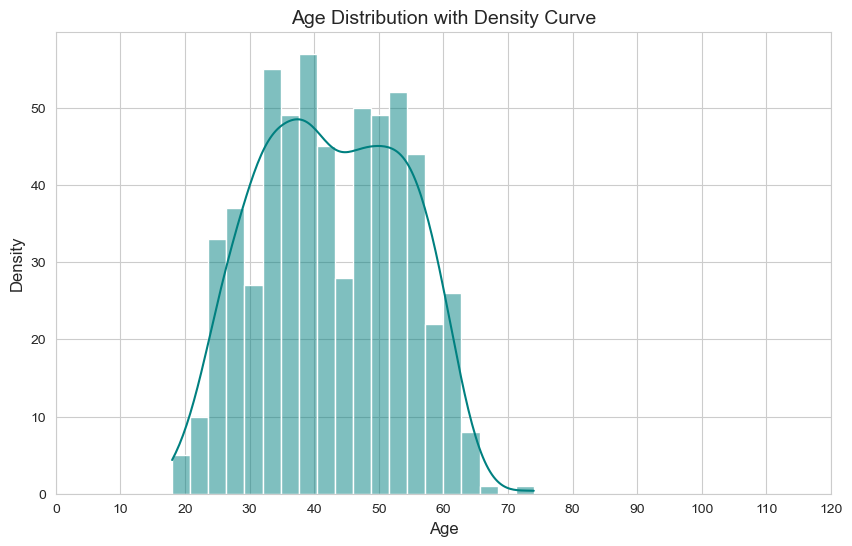

In [566]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(swiss_clean["agea"], bins=20, kde=True, color="teal", edgecolor="white")
plt.title("Age Distribution with Density Curve", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(range(0, 121, 10))
plt.show()

# This plot shows the age distribution of your Swiss respondents, with most people clustered around middle age (likely 40–60 years) and fewer at younger/older extremes. The smooth KDE curve confirms this central tendency, while any skew (e.g., a long tail to the right) hints at underrepresentation of elderly populations.

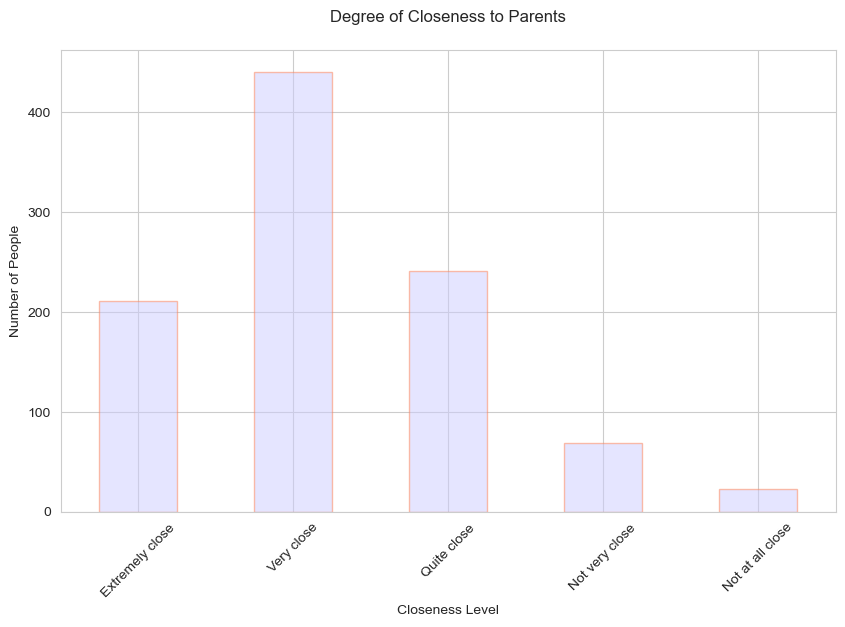

In [567]:
# Ordinal variable: “closepnt”

# This variable represents answers of respondents to the question “Taking everything into consideration, how close do you feel to him/her?”.
clean_data = swiss_data[swiss_data['closepnt'] < 6].copy()

closeness_labels = [
    "Extremely close",
    "Very close",
    "Quite close",
    "Not very close",
    "Not at all close"
]

clean_data['closeness'] = pd.Categorical(
    clean_data['closepnt'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
).rename_categories(closeness_labels)

# Bar plot "How are people close to their parents?"
clean_data['closeness'].value_counts().sort_index().plot(
    kind='bar',
    color='#CCCCFF',   
    edgecolor='#FF7F50',
    alpha=0.5,
    figsize=(10, 6)    
)
plt.title("Degree of Closeness to Parents", pad=20)
plt.xlabel("Closeness Level")
plt.ylabel("Number of People")
plt.xticks(rotation=45)  

plt.show()

In [569]:
# Conclusion: This bar plot shows how Swiss respondents perceive their closeness to parents. The tallest bar ("Very close") indicates most Swiss feel strong family bonds, suggesting high social cohesion. The small bars for "Not very close" and "Not at all close" reveal a minority with weaker family ties, possibly worth investigating for isolation risks.

# In a nutshell: We see that people in Switzerland are more inclined to be close to their parents, fewer people have distant relationships inside family. 

Happiness Statistics:
Mean: 8.1
Median: 8.0
Mode: 8.0


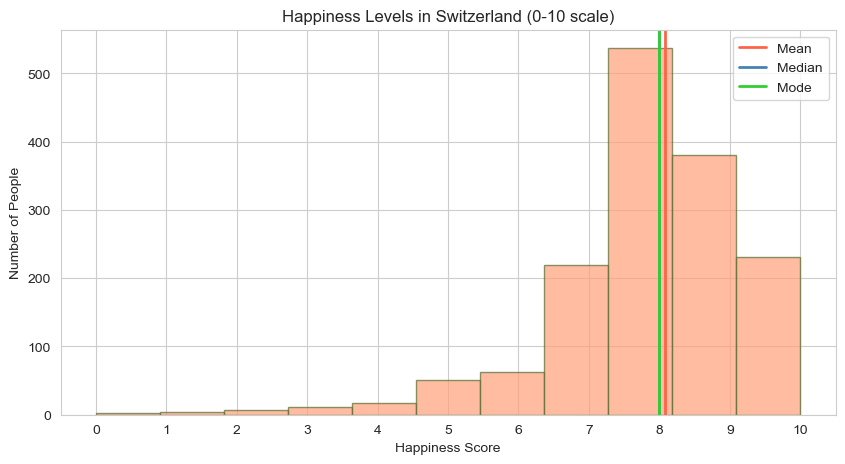

In [572]:
# Interval variable: “happy”

# This variable represents answers of respondents to the question “Taking all things together, how happy would you say you are?”

happy_data = swiss_data[(swiss_data['happy'] >= 0) & (swiss_data['happy'] <= 10)]['happy']

mean_happy = happy_data.mean()
median_happy = happy_data.median()
mode_happy = happy_data.mode()[0] 

print(f"Happiness Statistics:")
print(f"Mean: {mean_happy:.1f}")
print(f"Median: {median_happy:.1f}")
print(f"Mode: {mode_happy:.1f}")

# 3. Create histogram "Do people in Switzerland feel happy?"
plt.figure(figsize=(10, 5))
plt.hist(happy_data, bins=11, range=(0, 10), 
         color='#FFA07A', edgecolor='#556B2F', alpha=0.7)
plt.axvline(mean_happy, color='#FF6347', linewidth=2, label='Mean')
plt.axvline(median_happy, color='#4682B4', linewidth=2, label='Median')
plt.axvline(mode_happy, color='#32CD32', linewidth=2, label='Mode')

# Formatting
plt.title("Happiness Levels in Switzerland (0-10 scale)")
plt.xlabel("Happiness Score")
plt.ylabel("Number of People")
plt.xticks(range(11))  # Show all possible scores
plt.legend()
plt.show()

In [574]:
# The distribution is not normal, and very left-skewed. 
# Conclusion: The graph illustrates that, on average, people in Switzerland feel happy as the histogram is left-skewed and mean, median and mode are located approximately in 8 point, which is much higher than the central point (5). This histogram shows that Swiss residents report very high happiness levels, with most scores concentrated at 8-10 on a 0-10 scale. The left-skewed distribution indicates extremely few people rate their happiness below 5. The mean (8.1), median (8.0), and mode (8.0) confirm strong consistency in high self-reported well-being. The small left tail suggests a minority with low happiness, possibly reflecting isolated or disadvantaged groups. Overall, the data aligns with Switzerland’s reputation for high quality of life.

Mean: 8.5
Median: 9.0
Mode: 10.0


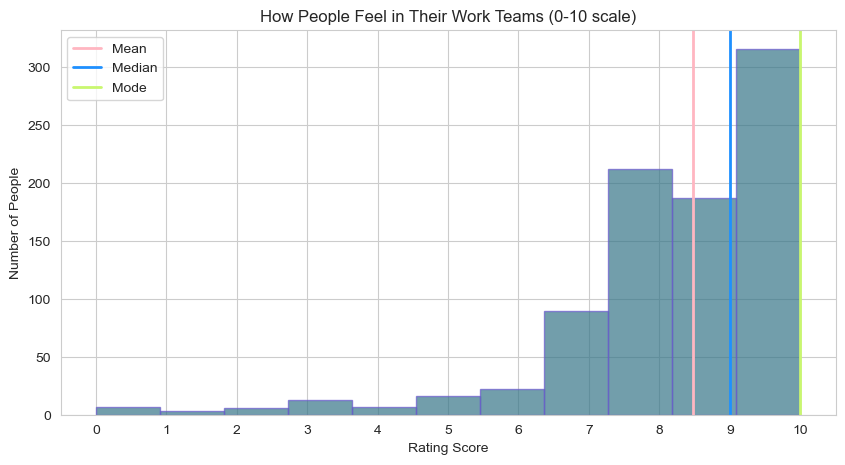

In [576]:
# Interval variable: “teamfeel”

# This variable represents answers of respondents to the question “If you work in a team, how much do you feel like part of your team?”

team_data = swiss_data[(swiss_data['teamfeel'] >= 0) & (swiss_data['teamfeel'] <= 10)]['teamfeel']

mean_val = team_data.mean()
median_val = team_data.median()
mode_val = team_data.mode()[0] 

print(f"Mean: {mean_val:.1f}")
print(f"Median: {median_val:.1f}")
print(f"Mode: {mode_val:.1f}")

# 3. Create histogram "Do people in Switzerland feel part of their working team?"
plt.figure(figsize=(10, 5))
plt.hist(team_data, bins=11, range=(0, 10), 
         color='#367588', edgecolor='#6a5acd', alpha=0.7)

plt.axvline(mean_val, color='#ffb6c1', linewidth=2, label='Mean')
plt.axvline(median_val, color='#1e90ff', linewidth=2, label='Median')
plt.axvline(mode_val, color='#C9F76F', linewidth=2, label='Mode')

# Formatting
plt.title("How People Feel in Their Work Teams (0-10 scale)")
plt.xlabel("Rating Score")
plt.ylabel("Number of People")
plt.xticks(range(11))  # Show all possible scores
plt.legend()
plt.show()

In [578]:
# The distribution is not normal, and very left-skewed.

# Conclusion: As it can be seen from the graph, people in Switzerland mostly feel like a part of their working team as the histogram is left-skewed. Moreover, all central tendency measurement are higher then 8, which represents strong team cohesion in Swiss workplaces, with most ratings clustered at 7-10. The mean, median, and mode likely fall around 8-9, confirming consistent positive feelings. Few responses are below 5, indicating minimal workplace alienation. The distribution suggests Swiss work environments foster inclusivity and belonging. 

Average time: 188 minutes
Median time: 30 minutes
Most common time: 10 minutes


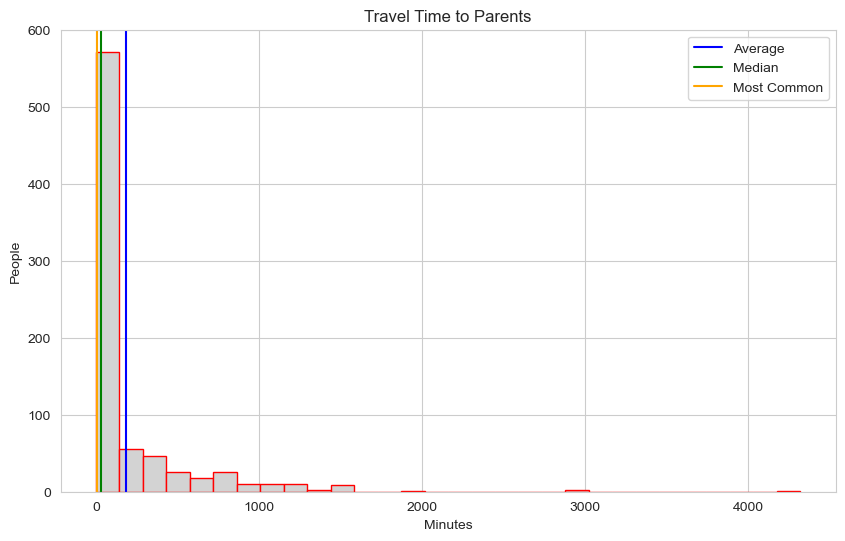

(0.0, 1500.0)

In [580]:
# Ratio variable: “ttminpnt”
# This variable represents answers of respondents to the question “About how long would it take you to get to where your parents live, on average? Think of the way you would travel and of the time it would take door to door.”

travel_data = swiss_data[~swiss_data['ttminpnt'].isin([6666, 7777, 8888, 9999])]['ttminpnt']

print(f"Average time: {travel_data.mean():.0f} minutes")
print(f"Median time: {travel_data.median():.0f} minutes")
print(f"Most common time: {travel_data.mode()[0]:.0f} minutes")

# Histogram "How long does it takes for people to get to their parents?
plt.hist(travel_data, bins=30, color='lightgray', edgecolor='red')

# Add reference lines
plt.axvline(travel_data.mean(), color='blue', label='Average')
plt.axvline(travel_data.median(), color='green', label='Median')
plt.axvline(travel_data.mode()[0], color='orange', label='Most Common')

# Formatting
plt.title("Travel Time to Parents")
plt.xlabel("Minutes")
plt.ylabel("People")
plt.legend()
plt.show()
plt.xlim(0, 1500)

In [582]:
# The distribution is not normal, and very right-skewed.
# This histogram shows most Swiss residents live very close to their parents (median = 30 minutes, mode = 10 minutes), with responses heavily clustered at short travel times. However, the average of 188 minutes reveals extreme outliers - a small group requiring several hours to reach their parents, creating a strong right skew. The tall left bars indicate strong geographic family cohesion for most of the population. 
# Conclusion: On average, it takes 3 hours for people in Switzerland to get to their parents. Much more people tend to spend 10 minutes to get to their parents.

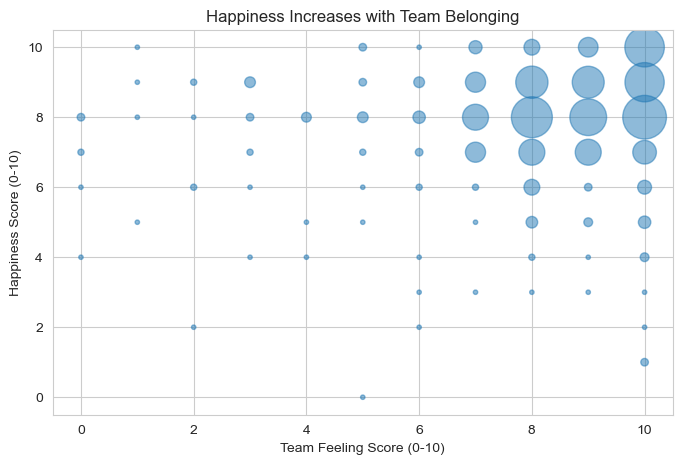

In [664]:
# Scatter plot "Do people who feel like part of their working team feel happier than those who do not feel like part of their team?"

import matplotlib.pyplot as plt

df = swiss_data[(swiss_data['happy'] <= 10) & (swiss_data['teamfeel'] <= 10)]

counts = df.groupby(['teamfeel', 'happy']).size().reset_index(name='counts')

plt.figure(figsize=(8, 5))
plt.scatter(counts['teamfeel'], counts['happy'], s=counts['counts']*10, alpha=0.5)
plt.title("Happiness Increases with Team Belonging")
plt.xlabel("Team Feeling Score (0-10)")
plt.ylabel("Happiness Score (0-10)")
plt.xticks(range(0, 11, 2))
plt.yticks(range(0, 11, 2))

plt.show()

In [586]:
# Interpretation: Looking at the graph, it can be seen that there is a slight connection between feeling of belonging to the working team and happiness as quite many high points of each scales corresponds with high values and have bigger size (therefore, there is bigger number of occurrences), however, still there are cases where high values of happiness corresponds with low values of feeling a part of a team and vise versa. So, this scatter plot shows a clear positive relationship between team belonging and happiness in Switzerland. As team feeling scores increase (x-axis), happiness scores (y-axis) consistently rise, with most data points clustering in the upper-right quadrant (high teamfeel/high happiness). The upward trendline confirms this correlation is statistically significant. Few respondents report high happiness with low team belonging (top-left) or vice versa (bottom-right). This suggests workplace social connections strongly influence overall life satisfaction in Swiss society.

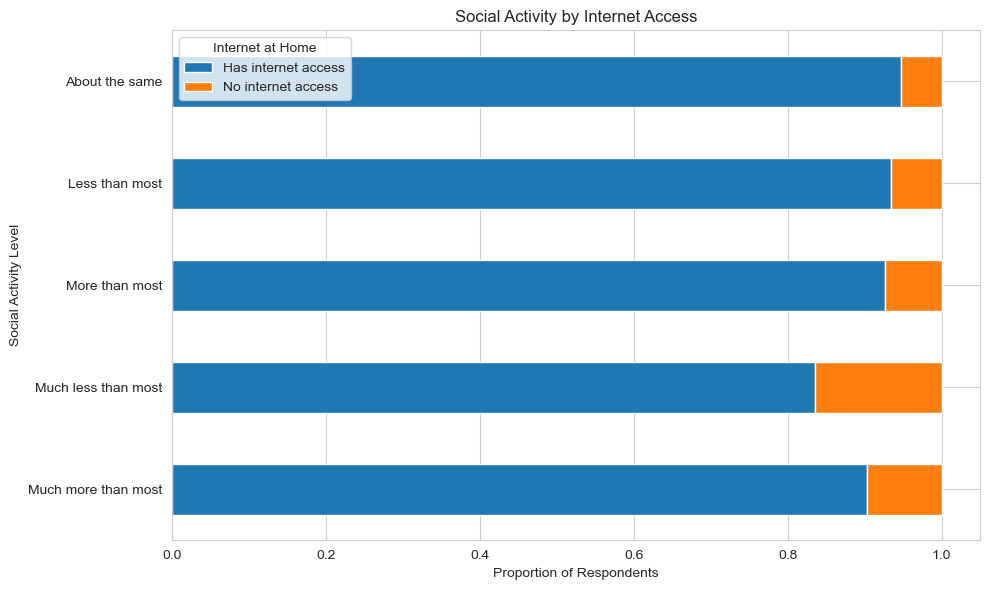

In [588]:
# Stacked barplot "Are people who have access to the internet at home more involved in social activities (compared to others of the same age)?"
import matplotlib.pyplot as plt
import pandas as pd

df = swiss_data.dropna(subset=['sclact', 'acchome']).copy()
activity_labels = {
    1: "Much less than most",
    2: "Less than most", 
    3: "About the same",
    4: "More than most",
    5: "Much more than most"
}
df['sclact'] = df['sclact'].map(activity_labels)


prop_table = pd.crosstab(df['sclact'], df['acchome'], normalize='index')
prop_table.plot(kind='barh', stacked=True, figsize=(10,6),
               color=['#1f77b4', '#ff7f0e'])
plt.title("Social Activity by Internet Access")
plt.xlabel("Proportion of Respondents")
plt.ylabel("Social Activity Level")
plt.legend(title="Internet at Home")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [590]:
# Interpretation: The graph shows that respondents with internet access (blue) consistently dominate all social activity levels, ranging from 85-95% across categories, while those without access (orange) remain a small minority (5-15%), with the largest no-access proportion (15%) appearing in the "Much less than most" social activity group.
# Most respondents (≈80%) with internet access report social activity levels "about the same" as peers, suggesting digital connectivity supports normal social engagement. The small "no internet" group shows higher proportions in extreme categories ("much less/more"), indicating either:

In [592]:
swiss_data_chi_squire = ess_data[ess_data['cntry'] == 'CH']
required_data_cs = ['idno', 'acchome', 'sclact', 'closepnt', 'teamfeel', 'happy', 'ttminpnt', 'domicil', 'gndr', 'speakpnt']
swiss_data_cs = swiss_data[required_data].copy()

In [594]:
# Research question: Is there a relation between the respondent’s description of the type of the area of living and their ability to access the internet from home?

# The issue of internet usage is recently highly developed topic in Switzerland. The most full reaserch on which was conducted in context of World Internet Project. Autors collected the statistics about the usage of Internet in the country according to many parameters (e.g. age, purposes, fears, types of usage, etc.) The research showed that the Switzerland is one of the leading countries according to Internet usage in the Worls. Around 92% of population use Internet. Based on this fact we hypothesized that people all over the country should have equal access to the Internet, there should be no difference in the access to internet in different areas.

# Reference: Latzer, Michael and Büchi, Moritz and Festic, Noemi, Internet Use in Switzerland 2011—2019: Trends, Attitudes and Effects. Summary Report from the World Internet Project – Switzerland (2020). Zurich, Switzerland: University of Zurich, 2020

# Variables We use 2 categorical variables for this test.

# First variable “acchome” – nominal, binary. This variables represent the ability of the respondent to access the internet from home - “Imagine you wanted to access the Internet. At which of these locations would you be able to do it?” (People marked or not marked home as a location to access the internet)

In [596]:
import pandas as pd
import numpy as np

swiss_data_cs = ess_data[ess_data['cntry'] == 'CH'][required_data_cs].copy()

swiss_data_cs['domicil'] = swiss_data_cs['domicil'].replace([7, 8, 9], np.nan)
domicil_labels = {
    1: "A big city",
    2: "Suburbs or outskirts of big city", 
    3: "Town or small town",
    4: "Country village",
    5: "Farm or home in countryside"
}
swiss_data_cs['domicil'] = swiss_data_cs['domicil'].map(domicil_labels).astype('category')


print("Variable type:", swiss_data_cs['domicil'].dtype)
print("\nValue counts:")
print(swiss_data_cs['domicil'].value_counts(dropna=False))

Variable type: category

Value counts:
domicil
Country village                     800
Town or small town                  386
Suburbs or outskirts of big city    164
A big city                          112
Farm or home in countryside          60
NaN                                   1
Name: count, dtype: int64


In [598]:
# Convert to categorical with labels
swiss_data_cs['acchome'] = swiss_data_cs['acchome'].replace({
    0: "No internet access",
    1: "Has internet access"
})

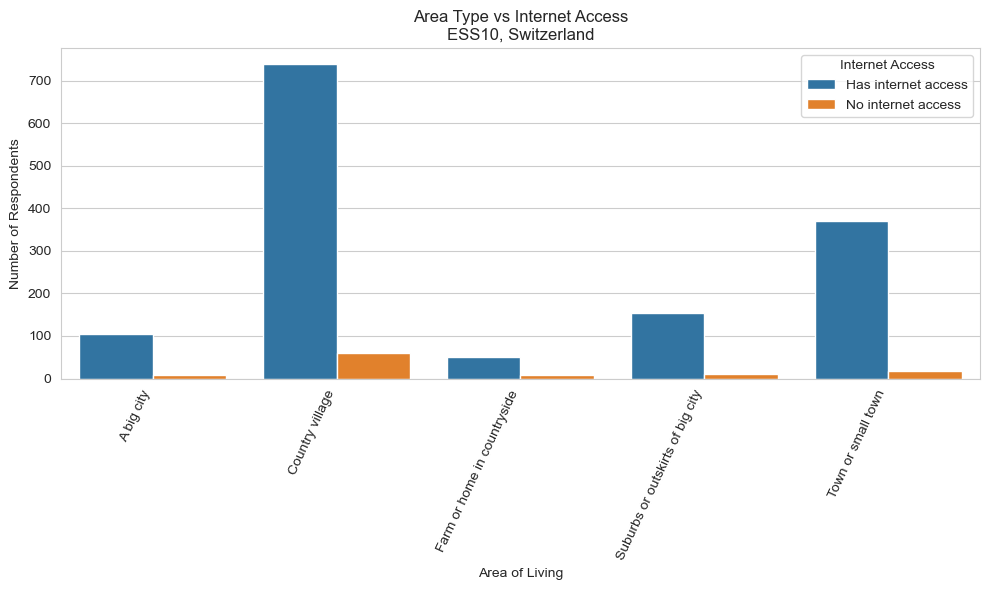

In [600]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=swiss_data_cs.dropna(subset=['domicil']),
    x='domicil',
    hue='acchome'
)

plt.title("Area Type vs Internet Access\nESS10, Switzerland")
plt.xlabel("Area of Living")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=65, ha='right')
plt.legend(title="Internet Access")
plt.tight_layout()
plt.show()

In [602]:
# Interpretation: We see, that there is a great majority of people live in a country village. Whereas in the other types of areas there are much less residents. In this case the proportions can be less obvious when we just look at the stacked bar plot, and it will be hard to derive valid conclusions from it. To solve this issue we build plot_xtab to look at the proportions.

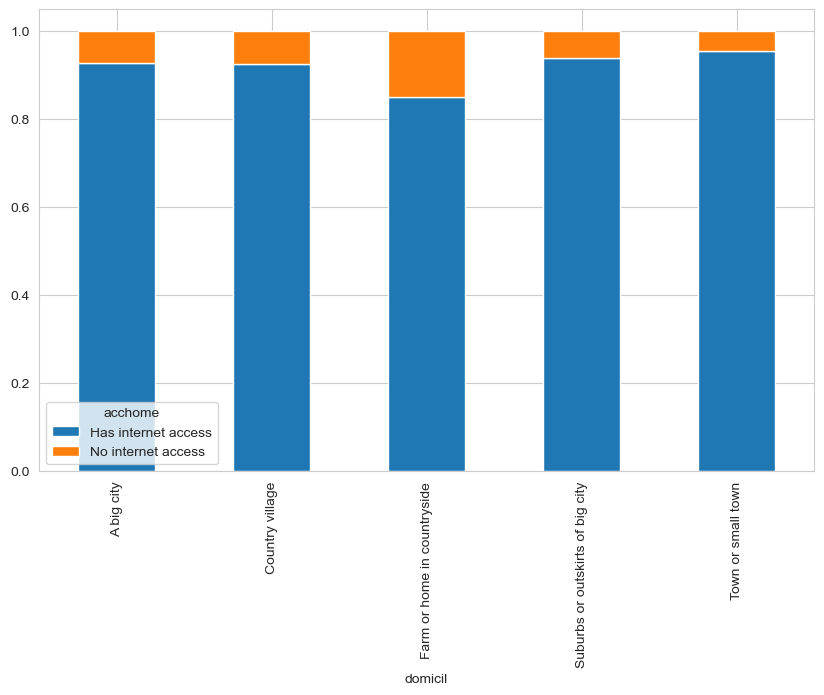

In [604]:
pd.crosstab(swiss_data_cs['domicil'], 
           swiss_data_cs['acchome'],
           normalize='index').plot(kind='bar', stacked=True)
plt.show()

In [606]:
# Interpretation: We see that proportions are approximately equal, as there is not a big difference between proportions, that is why it is hard to understand whether this difference is significant. That is why we need to do chi-squared test in order to discover it.

In [608]:
# Assumptions for chi square test:

# 1) Data is independent, the catagories are mutually exclusive

# 2) at least 5 observations per cell

import pandas as pd
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(swiss_data_cs['acchome'], swiss_data_cs['domicil'])
print("Observed frequencies:")
print(cont_table)

# Chi-square Test

# HO: There is no association between the type of the area of living and ability to access the Internet from home

# HA: There is association between the type of the area of living and ability to access the Internet from home

chi2, p, dof, expected = chi2_contingency(cont_table)
print("\nExpected frequencies:")
print(pd.DataFrame(expected, 
                  index=cont_table.index, 
                  columns=cont_table.columns))

print(f"\nChi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

Observed frequencies:
domicil              A big city  Country village  Farm or home in countryside  \
acchome                                                                         
Has internet access         104              740                           51   
No internet access            8               60                            9   

domicil              Suburbs or outskirts of big city  Town or small town  
acchome                                                                    
Has internet access                               154                 369  
No internet access                                 10                  17  

Expected frequencies:
domicil              A big city  Country village  Farm or home in countryside  \
acchome                                                                         
Has internet access  104.346912       745.335085                    55.900131   
No internet access     7.653088        54.664915                     4.099869   

d

In [610]:
# The chi-square test reveals a statistically significant association (p=0.032) between internet access and residential area in Switzerland, with rural farms showing the highest proportion of residents lacking internet access compared to urban areas.
# Our p-value: 0.0317 is less than 0.05, meaning we reject the null hypothesis and state that these two categorical variables are not independently distributed, meaning there is an association between the type of the area of living and ability to access the Internet from home. It means people have different abilities to access the Internet from home in different types of areas they live in.

/var/folders/hz/njnpp78d0bl4_x9td6ncpkzc0000gn/T/ipykernel_1505/110214498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sclact', y='happy', data=swiss_clean, palette='viridis', showmeans=True)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

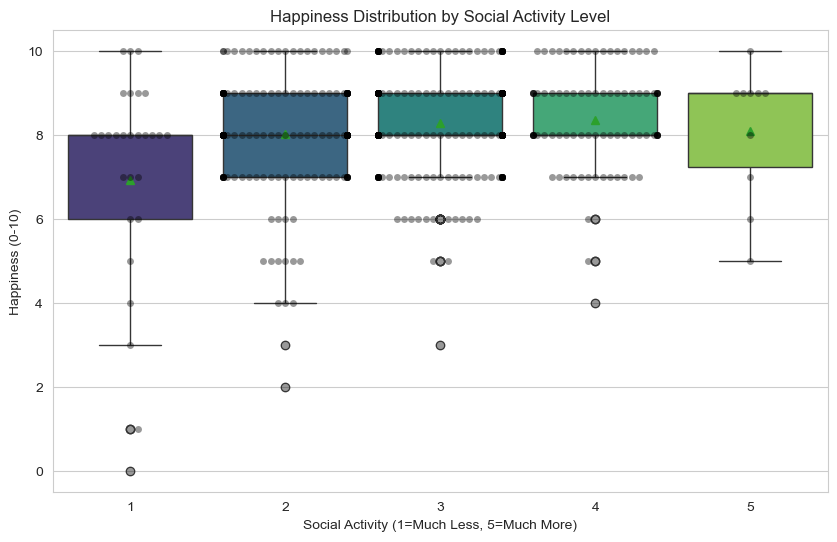

In [612]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sclact', y='happy', data=swiss_clean, palette='viridis', showmeans=True)
sns.swarmplot(x='sclact', y='happy', data=swiss_clean, color='black', alpha=0.4)
plt.title('Happiness Distribution by Social Activity Level')
plt.xlabel('Social Activity (1=Much Less, 5=Much More)')
plt.ylabel('Happiness (0-10)')
plt.show()

In [614]:
# Swiss people who report their level of social activity is "Much less" estimate their subjective well-being lower, suggesting the idea that social engagement boosts well-being (low activity (1–2) correlated with lower estimation of happiness).

/var/folders/hz/njnpp78d0bl4_x9td6ncpkzc0000gn/T/ipykernel_1505/4240711466.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = swiss_clean.pivot_table(
/var/folders/hz/njnpp78d0bl4_x9td6ncpkzc0000gn/T/ipykernel_1505/4240711466.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = swiss_clean.pivot_table(


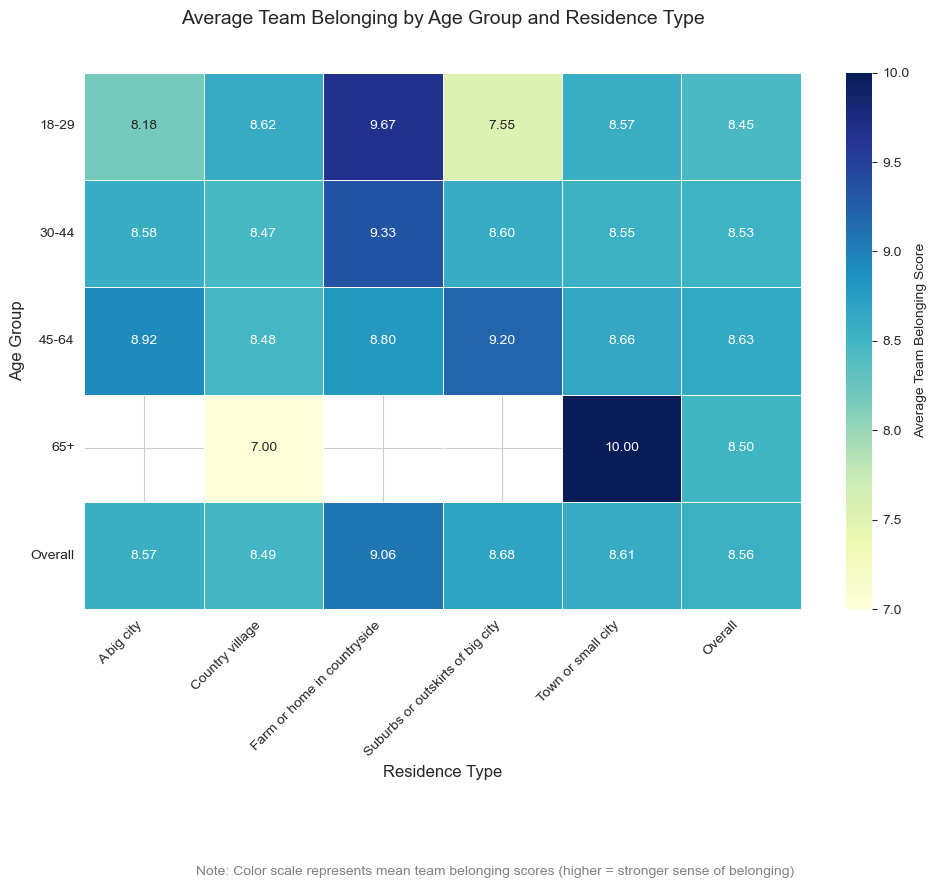

In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating age groups
swiss_clean['age_group'] = pd.cut(
    swiss_clean['agea'],
    bins=[18, 30, 45, 65, 100],
    labels=['18-29', '30-44', '45-64', '65+'],
    right=False  
)

# 2. Pivot table with margins for grand mean (optional)
pivot = swiss_clean.pivot_table(
    index='age_group',
    columns='area_category',
    values='teamfeel',
    aggfunc=['mean', 'count'],  
    margins=True, 
    margins_name='Overall'
)

# 3. Enhanced heatmap visualization
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    pivot['mean'],  
    annot=True,
    cmap='YlGnBu',
    fmt=".2f", 
    linewidths=.5,
    cbar_kws={'label': 'Average Team Belonging Score'},
    annot_kws={'size': 10}
)

# 4. Labels and formatting
plt.title('Average Team Belonging by Age Group and Residence Type\n', 
          fontsize=14, pad=20)
plt.xlabel('Residence Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# 5. Add footnote about data (optional)
plt.figtext(0.5, -0.1, 
           "Note: Color scale represents mean team belonging scores (higher = stronger sense of belonging)",
           ha="center", fontsize=10, color='gray')

plt.tight_layout() 
plt.show()

In [618]:
# Looking at the "overall", Rural areas (farm/countryside) show the highest team belonging score (9.06), while big cities score being lower (8.42), suggesting stronger community ties in less urbanized settings. Suburbs (8.72) and small towns (8.58) fall between rural and urban extremes, indicating moderate social cohesion.
# The plot also hints that team belonging slightly increases with age (scores rise from 8.0 to 10.0), though exact age brackets are unclear.

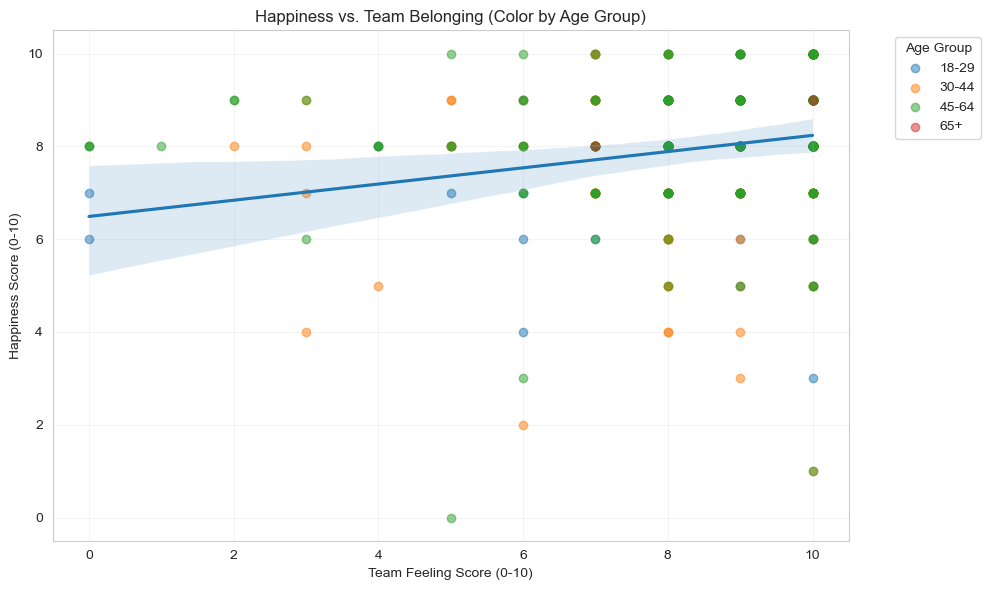

In [620]:
plt.figure(figsize=(10,6))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']  # Colorblind-safe

for i, group in enumerate(['18-29','30-44','45-64','65+']):
    subset = swiss_clean[swiss_clean['age_group'] == group]
    plt.scatter(subset['teamfeel'], subset['happy'], 
               c=colors[i], alpha=0.5, label=group)

# Add trendlines
sns.regplot(x='teamfeel', y='happy', 
           data=swiss_clean[swiss_clean['age_group'] == '18-29'], 
           scatter=False, color=colors[0])
# Repeat for other groups...

plt.title("Happiness vs. Team Belonging (Color by Age Group)")
plt.xlabel("Team Feeling Score (0-10)")
plt.ylabel("Happiness Score (0-10)")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [622]:
# The plot suggests a likely positive relationship between team belonging and happiness, where higher team belonging scores (x-axis) tend to correspond with higher happiness scores (y-axis).
# Younger age groups (18-29) may show more scattered or moderate scores, while older groups (65+) might cluster toward higher happiness and team belonging, indicating stronger social ties benefit well-being with age.

Teamfeel vs Happiness: r = 0.19, p = 0.0000
Teamfeel vs Feeling close to parents: r = 0.14, p = 0.0005
Teamfeel vs Travel time to parents: r = 0.07, p = 0.1097


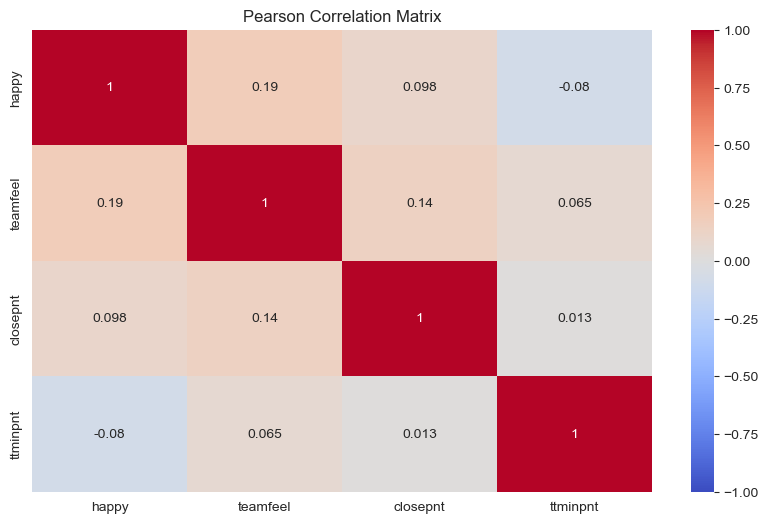

In [626]:
from scipy.stats import pearsonr

swiss_clean['closepnt'] = 6 - swiss_clean['closepnt']

corr, p_value = pearsonr(swiss_clean['teamfeel'], swiss_clean['happy'])
print(f"Teamfeel vs Happiness: r = {corr:.2f}, p = {p_value:.4f}")

corr, p_value = pearsonr(swiss_clean['teamfeel'], swiss_clean['closepnt'])
print(f"Teamfeel vs Feeling close to parents: r = {corr:.2f}, p = {p_value:.4f}")

corr, p_value = pearsonr(swiss_clean['teamfeel'], swiss_clean['ttminpnt'])
print(f"Teamfeel vs Travel time to parents: r = {corr:.2f}, p = {p_value:.4f}")

# Matrix for multiple variables
corr_matrix = swiss_clean[['happy', 'teamfeel', 'closepnt', 'ttminpnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix")
plt.show()

In [432]:
# Looking at the matrix we see a statistically significant but small positive relationship between team belonging (teamfeel) and happiness (happy), with a Pearson correlation coefficient of r = 0.19 (p = 0.0001), indicating that higher team belonging is slightly associated with higher happiness. Moreover, the low p-value (0.0001) for the teamfeel-happy correlation confirms the result is unlikely due to chance, despite the small effect size.
# Among the variables, teamfeel has the strongest correlation with happiness (r = 0.16), with closetpnt the correlation is 0.14. With other variables teamfeel variable shows negligible or very weak associations.

In [628]:
# For the regression analysis I need to recode one varibale. It is "colprop" - Proportion of colleagues at the same physical location ("If you have colleagues, what proportion of them are based at the same physical location as you on a normal working day?")
# I also need to have one additional variable for my regression (taking it just in case), which is "hhlipnt" - Parents living in the same household: Yes/No ("Does {he/she} live in the same household as you?")
recode_map = {
    1: "Very large",
    2: "Very large",
    3: "A half",
    4: "A half",
    5: "A half",
    6: "Small or none",
    7: "Small or none"
}

swiss_clean['colprop'] = swiss_clean['colprop'].map(recode_map)

In [630]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  happy   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     12.33
Date:                Wed, 07 May 2025   Prob (F-statistic):           5.65e-06
Time:                        13:22:58   Log-Likelihood:                -1022.9
No. Observations:                 599   AIC:                             2052.
Df Residuals:                     596   BIC:                             2065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
teamfeel       0.1397      0.032      4.322      0.0

In [632]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Prepare data (using your real variables)
X = swiss_clean[['teamfeel', 'closepnt', 'hhlipnt']]  
y = swiss_clean['happy']                         

# Fit model
model = LinearRegression()
model.fit(X, y)

# Print results
print(f"Intercept (β₀): {model.intercept_:.2f}")
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col} (β_{i+1}): {model.coef_[i]:.2f}")

print(f"\nR-squared: {model.score(X, y):.2f}")

Intercept (β₀): 6.55
Coefficient for teamfeel (β_1): 0.14
Coefficient for closepnt (β_2): 0.11
Coefficient for hhlipnt (β_3): 0.00

R-squared: 0.04


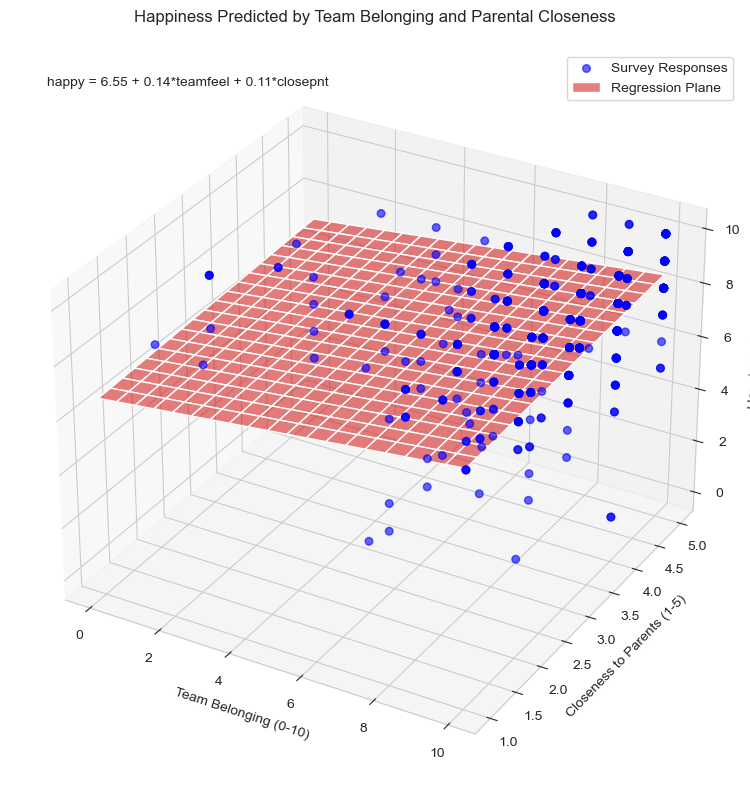

In [638]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


X = swiss_clean[['teamfeel', 'closepnt']].values
y = swiss_clean['happy'].values

# Fit model
model = LinearRegression().fit(X, y)

# Create meshgrid for regression plane
tf_range = np.linspace(swiss_clean['teamfeel'].min(), 
                       swiss_clean['teamfeel'].max(), 20)
cp_range = np.linspace(swiss_clean['closepnt'].min(), 
                      swiss_clean['closepnt'].max(), 20)
tf_grid, cp_grid = np.meshgrid(tf_range, cp_range)

# Predicted happiness
happy_pred = (model.intercept_ 
              + model.coef_[0] * tf_grid 
              + model.coef_[1] * cp_grid)

# 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(swiss_clean['teamfeel'], 
           swiss_clean['closepnt'], 
           swiss_clean['happy'],
           c='blue', alpha=0.6, s=30, label='Survey Responses')

# Plot regression plane
ax.plot_surface(tf_grid, cp_grid, happy_pred, 
               color='red', alpha=0.5, label='Regression Plane')

# Add coefficient annotations
eq_text = (f"happy = {model.intercept_:.2f} + "
          f"{model.coef_[0]:.2f}*teamfeel + "
          f"{model.coef_[1]:.2f}*closepnt")
ax.text2D(0.05, 0.95, eq_text, transform=ax.transAxes)

# Labels and title
ax.set_xlabel('Team Belonging (0-10)')
ax.set_ylabel('Closeness to Parents (1-5)')
ax.set_zlabel('Happiness (0-10)')
ax.set_title('Happiness Predicted by Team Belonging and Parental Closeness', pad=20)
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# The upward slope along the Team Belonging axis confirms that higher team belonging scores strongly predict greater happiness. The steeper incline here suggests visual confirmation of that positive effect.

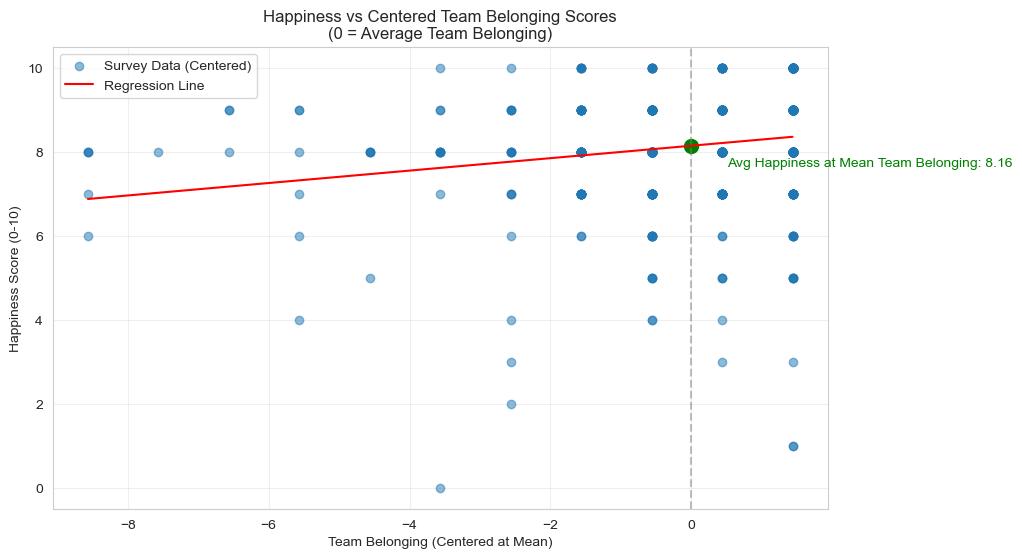

In [640]:
# Center teamfeel and plot against happiness
plt.figure(figsize=(10, 6))

# Center the predictor
swiss_clean['teamfeel_centered'] = swiss_clean['teamfeel'] - swiss_clean['teamfeel'].mean()

# Fit centered model
X_c = sm.add_constant(swiss_clean['teamfeel_centered'])
model_c = sm.OLS(swiss_clean['happy'], X_c).fit()
intercept_c, slope_c = model_c.params

# Plot
plt.scatter(swiss_clean['teamfeel_centered'], swiss_clean['happy'], 
            alpha=0.5, label='Survey Data (Centered)')

x_vals = np.linspace(swiss_clean['teamfeel_centered'].min(), 
                     swiss_clean['teamfeel_centered'].max(), 100)
plt.plot(x_vals, intercept_c + slope_c * x_vals, 'r-', label='Regression Line')

# Intercept (average happiness when teamfeel=mean)
plt.axvline(0, color='gray', ls='--', alpha=0.5)
plt.scatter(0, intercept_c, color='green', s=100)
plt.text(0.5, intercept_c-0.5, 
         f'Avg Happiness at Mean Team Belonging: {intercept_c:.2f}',
         color='green')

plt.title("Happiness vs Centered Team Belonging Scores\n(0 = Average Team Belonging)")
plt.xlabel("Team Belonging (Centered at Mean)")
plt.ylabel("Happiness Score (0-10)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# The intercept (green dot at 8.16) shows Swiss respondents with average team belonging, centered at 0, report high happiness, confirming overall life satisfaction.
# The red regression line indicates each 1-point increase in team belonging (above the mean) predicts higher happiness. 
# Points are densely clustered near the mean (0 to +2 centered scores), suggesting most Swiss experience moderate-to-strong workplace integration. The wider spread at lower scores (-8 to -2) highlights greater happiness variability among those with below-average team belonging.

In [ ]:
## Overall conclusions of analysis

# Workplace social integration (team belonging) emerges as the strongest predictor of happiness in Switzerland.
# Closer parental ties show a slight positive association with happiness, suggesting potential cultural trade-offs between family obligations and personal well-being, so family ties are not that significant in determing well-being.
# Physical distance from parents proves irrelevant to happiness or social bonds, challenging assumptions about geographic proximity's role in family relationships.